In [10]:
%load_ext autoreload
%autoreload 2

import os
from Bio import PDB
import numpy as np
import pandas as pd
from pathlib import Path
import py3Dmol
import warnings
import Bio
from Bio.PDB import PDBParser, Superimposer

from benchmark import visualize_structure_alignment, plot_with_error

warnings.simplefilter("ignore", Bio.PDB.PDBExceptions.PDBConstructionWarning)


pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def compute_rmsd(pdb_path_1: str, pdb_path_2: str, model_index: int = 0) -> float:
    """
    Compute the RMSD between two PDB files based on their CA atoms.

    Args:
        pdb_path_1 (str): Path to first PDB file.
        pdb_path_2 (str): Path to second PDB file.
        model_index (int): Index of the model to use if multiple models are present.

    Returns:
        float: RMSD value.
    """
    parser = PDBParser(QUIET=False)

    structure1 = parser.get_structure("structure1", pdb_path_1)
    structure2 = parser.get_structure("structure2", pdb_path_2)

    atoms1 = []
    atoms2 = []

    for res1, res2 in zip(
        structure1[model_index].get_residues(), structure2[model_index].get_residues()
    ):
        if res1.has_id("CA") and res2.has_id("CA"):
            atoms1.append(res1["CA"])
            atoms2.append(res2["CA"])

    if len(atoms1) != len(atoms2):
        raise ValueError(f"Residue mismatch: {len(atoms1)} != {len(atoms2)}")

    sup = Superimposer()
    sup.set_atoms(atoms1, atoms2)
    return sup.rms


compute_rmsd(
    "./data/casp15_targets_TSdomains_4invitees/T1104-D1_casp.pdb",
    # "./data/bio2token_casp/T1104-D1_bio2token.pdb",
    "./data/bio2token_casp_backbone_only/T1104-D1_bio2token_backbone_only.pdb",
)


np.float64(0.5321007987248074)

In [12]:
truth_dir = "data/casp15_targets_TSdomains_4invitees"
pred_dirs = [
    "data/casp15_targets_TSdomains_4invitees",
    "data/bio2token_casp",
    "data/bio2token_casp_backbone_only",
    "data/foldtoken_level5_casp",
    "data/foldtoken_level6_casp",
    "data/foldtoken_level7_casp",
    "data/foldtoken_level8_casp",
    "data/foldtoken_level9_casp",
    "data/foldtoken_level10_casp",
    "data/foldtoken_level12_casp",
]

parser = PDB.PDBParser()
truth_files = [f.split(".")[0] for f in os.listdir(truth_dir) if f.endswith(".pdb")]
truth_files.sort()

all_results = {}
for pred_dir in pred_dirs:
    pred_files = [f.split(".")[0] for f in os.listdir(pred_dir) if f.endswith(".pdb")]
    pred_files.sort()

    model_name = os.path.basename(pred_dir).replace("_casp", "")
    for truth_file, pred_file in zip(truth_files, pred_files):
        truth_name = truth_file.split("_")[0]
        pred_name = pred_file.split("_")[0]
        print(truth_name, pred_name)
        if truth_name != pred_name:
            raise ValueError(
                f"Truth file {truth_file} does not match prediction file {pred_file}"
            )
        else:
            target = truth_file.split(".")[0]
        try:
            rmsd = compute_rmsd(
                os.path.join(pred_dir, pred_file + ".pdb"),
                os.path.join(truth_dir, truth_file + ".pdb"),
            )
        except Exception as e:
            print(f"Error in RMSD calculation: {e}")
            rmsd = None

        if target not in all_results:
            all_results[target] = {}
        all_results[target][f"{model_name}_RMSD"] = rmsd

df = pd.DataFrame.from_dict(all_results, orient="index")
display(df)

T1104-D1 T1104-D1
T1106s1-D1 T1106s1-D1
T1106s2-D1 T1106s2-D1
T1109-D1 T1109-D1
T1110-D1 T1110-D1
T1112-D1 T1112-D1
T1113-D1 T1113-D1
T1114s1-D1 T1114s1-D1
T1114s2-D1 T1114s2-D1
T1114s3-D1 T1114s3-D1
T1119-D1 T1119-D1
T1120-D1 T1120-D1
T1120-D2 T1120-D2
T1121-D1 T1121-D1
T1121-D2 T1121-D2
T1122-D1 T1122-D1
T1123-D1 T1123-D1
T1124-D1 T1124-D1
T1125-D1 T1125-D1
T1125-D2 T1125-D2
T1125-D3 T1125-D3
T1125-D4 T1125-D4
T1125-D5 T1125-D5
T1125-D6 T1125-D6
T1127-D1 T1127-D1
T1129s2-D1 T1129s2-D1
T1130-D1 T1130-D1
T1131-D1 T1131-D1
T1132-D1 T1132-D1
T1133-D1 T1133-D1
T1134s1-D1 T1134s1-D1
T1134s2-D1 T1134s2-D1
T1137s1-D1 T1137s1-D1
T1137s1-D2 T1137s1-D2
T1137s2-D1 T1137s2-D1
T1137s2-D2 T1137s2-D2
T1137s3-D1 T1137s3-D1
T1137s3-D2 T1137s3-D2
T1137s4-D1 T1137s4-D1
T1137s4-D2 T1137s4-D2
T1137s4-D3 T1137s4-D3
T1137s5-D1 T1137s5-D1
T1137s5-D2 T1137s5-D2
T1137s6-D1 T1137s6-D1
T1137s6-D2 T1137s6-D2
T1137s7-D1 T1137s7-D1
T1137s8-D1 T1137s8-D1
T1137s9-D1 T1137s9-D1
T1139-D1 T1139-D1
T1145-D1 T1145-D1
T114

,casp15_targets_TSdomains_4invitees_RMSD,bio2token_RMSD,bio2token_backbone_only_RMSD,foldtoken_level5_RMSD,foldtoken_level6_RMSD,foldtoken_level7_RMSD,foldtoken_level8_RMSD,foldtoken_level9_RMSD,foldtoken_level10_RMSD,foldtoken_level12_RMSD
T1104-D1_casp,8.066176e-15,0.737521,0.532101,1.603654,1.380800,1.298154,0.966320,0.857345,0.820845,0.711739
T1106s1-D1_casp,5.437943e-15,0.894732,0.708064,2.235067,1.576464,1.694806,1.320534,1.098733,0.930388,1.077418
T1106s2-D1_casp,7.534734e-15,0.724124,0.558490,1.421836,1.411146,0.868377,0.822946,0.986992,0.912395,0.716482
T1109-D1_casp,6.309071e-15,0.706411,0.576618,2.772142,1.440362,1.801300,1.262320,1.122182,1.129094,1.081476
T1110-D1_casp,7.422256e-15,0.684899,0.623000,2.653970,2.027106,1.340347,1.325064,1.114246,1.369690,1.070269
T1112-D1_casp,4.568694e-15,0.903431,0.791257,4.641957,2.974979,2.605774,2.724899,2.286424,2.518600,2.502462
T1113-D1_casp,6.726620e-15,0.883217,0.784460,3.718407,2.969302,3.133844,3.135323,2.114748,2.257757,2.559514
T1114s1-D1_casp,1.861929e-14,0.952594,0.702298,0.968053,1.032799,1.075391,1.693519,1.922422,1.195107,1.469920
T1114s2-D1_casp,3.848046e-14,0.815802,0.630123,3.899639,3.332826,2.496847,2.011913,1.804377,1.621344,1.636948
T1114s3-D1_casp,1.254849e-15,0.858504,0.678045,3.279127,2.488172,1.913892,1.589001,1.534294,1.278400,1.339736


In [16]:
df.columns = [
    "casp",
    "bio2token",
    "bio2token backbone only",
    "foldtoken 32",
    "foldtoken 64",
    "foldtoken 128",
    "foldtoken 256",
    "foldtoken 512",
    "foldtoken 1024",
    "foldtoken 4096",
]


df.to_csv("./data/bio2token_casp_rmsd_results.csv", index=True)

---


In [17]:
casp_metadata = pd.read_csv("./data/casp_metadata.csv", delimiter="\t").drop(
    columns=["#"]
)
rmsd_results = pd.read_csv("./data/bio2token_casp_rmsd_results.csv", index_col=0)

casp_metadata = casp_metadata[casp_metadata["Classification"].str.fullmatch("FM")]

display(casp_metadata)

filtered_indices = [
    idx
    for idx in rmsd_results.index
    if any(target in idx for target in casp_metadata["Target"])
]
rmsd_results = rmsd_results.loc[filtered_indices]

display(rmsd_results)
df = rmsd_results

,Target,Residues,Type,Domains,Residues in domain,Classification,PDB
0,T1104,117,All groups,T1104-D1: 1-117,117,FM,7roa
6,T1113,193,All groups,T1113-D1: 1-192,192,FM,7uyx
14,T1120,235,All groups,T1120-D1: 8-125,118,FM,7qvb
15,T1120,235,All groups,T1120-D2: 126-235,110,FM,7qvb
16,T1121,381,All groups,T1121-D1: 2-204,203,FM,7til
18,T1122,241,All groups,T1122-D1: 4-237,234,FM,8bbt
21,T1125,1200,All groups,T1125-D1: 327-460,134,FM,8h2n
22,T1125,1200,All groups,T1125-D2: 461-608,148,FM,8h2n
24,T1125,1200,All groups,T1125-D4: 798-946,149,FM,8h2n
25,T1125,1200,All groups,T1125-D5: 947-1096,150,FM,8h2n


,casp,bio2token,bio2token backbone only,foldtoken 32,foldtoken 64,foldtoken 128,foldtoken 256,foldtoken 512,foldtoken 1024,foldtoken 4096
T1104-D1_casp,8.066176e-15,0.737521,0.532101,1.603654,1.380800,1.298154,0.966320,0.857345,0.820845,0.711739
T1113-D1_casp,6.726620e-15,0.883217,0.784460,3.718407,2.969302,3.133844,3.135323,2.114748,2.257757,2.559514
T1120-D1_casp,7.835760e-15,0.755351,0.561338,1.607281,1.600221,1.558989,1.238299,1.035735,1.335048,1.105757
T1120-D2_casp,4.032085e-15,0.795090,0.520390,1.926442,1.432745,0.949585,1.028857,0.922227,0.887018,0.903988
T1121-D1_casp,2.323581e-14,0.890124,0.801425,3.795151,2.488831,1.484729,2.025722,1.663299,1.418762,1.399452
T1121-D2_casp,2.909055e-14,0.945058,0.901407,2.066247,1.656643,1.425744,1.577678,1.387708,1.446935,1.193631
T1122-D1_casp,6.759126e-15,0.944706,0.809375,5.439527,2.644547,2.002693,2.395990,1.994762,1.641277,1.989896
T1125-D1_casp,5.009628e-15,0.802187,0.535114,3.084521,2.200077,1.110489,1.252971,1.202333,1.055077,0.914587
T1125-D2_casp,1.742278e-14,3.276015,3.231930,2.011476,1.501738,1.451648,1.206075,0.901925,0.984406,0.902483
T1125-D3_casp,4.081925e-15,5.249960,5.208395,1.991400,1.799675,1.108439,1.102238,0.930443,0.928630,1.183834


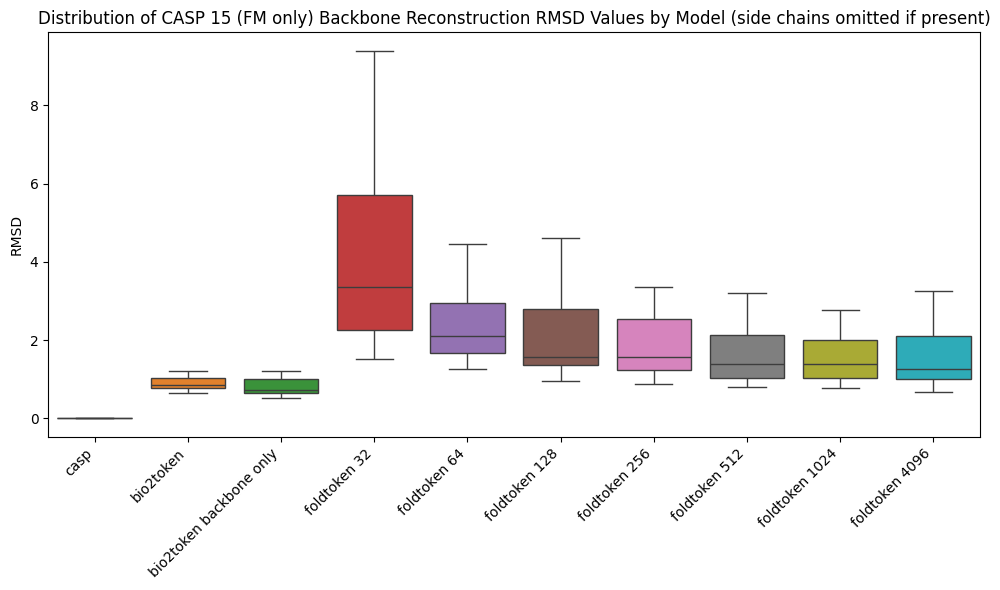

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.dropna(how="any"), showfliers=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSD")
plt.title(
    "Distribution of CASP 15 (FM only) Backbone Reconstruction RMSD Values by Model (side chains omitted if present)"
)
plt.tight_layout()
plt.show()


In [ ]:
df.describe()  # .to_csv("./data/bio2token_casp_rmsd_results_description.csv", index=True)